In [2]:
# show matplotlin inline without anomation
%matplotlib inline

import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
import numpy as np
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Trial
from collections import defaultdict
from typing import Dict

from law import read_experiments, parse_results, fit, optimize

In [6]:
def parse_val_res(res: Dict[str, ValResult]):
    out_dict = {}
    for domain, val_res in res.items():
        out_dict[domain] = val_res.loss
    
    return out_dict


def find_best_trial(exp: Experiment):
    trials = exp.trials

    best_trial = None
    for trial in trials:
        if trial.val_results is None:
            continue

        if best_trial is None or trial.weighted_val_perplexity < best_trial.weighted_val_perplexity:
            best_trial = trial

    return best_trial

In [11]:
ref_path = "../logs/uniform_books_cc_stack_peso_reddit/experiment_history.yaml"
path = "../logs/bayesian_books_cc_stack_pes2o_reddit_16init_1/experiment_history.yaml"
path = "../logs/bayesian_books_cc_stack_pes2o_reddit_32init_0/experiment_history.yaml"

ref_exp = read_experiments(ref_path)[0]
exp = read_experiments(path)[0]

best_ref_trial = find_best_trial(ref_exp)
best_trial = find_best_trial(exp)

print(f"Best ref trial weigthed val perplexity {best_ref_trial.weighted_val_perplexity}")
print(f"Best trial weighted val perplexity {best_trial.weighted_val_perplexity}")
ref_res = parse_val_res(best_ref_trial.val_results)
res = parse_val_res(best_trial.val_results)

Best ref trial weigthed val perplexity 4.41090335547924
Best trial weighted val perplexity 4.368822938203812


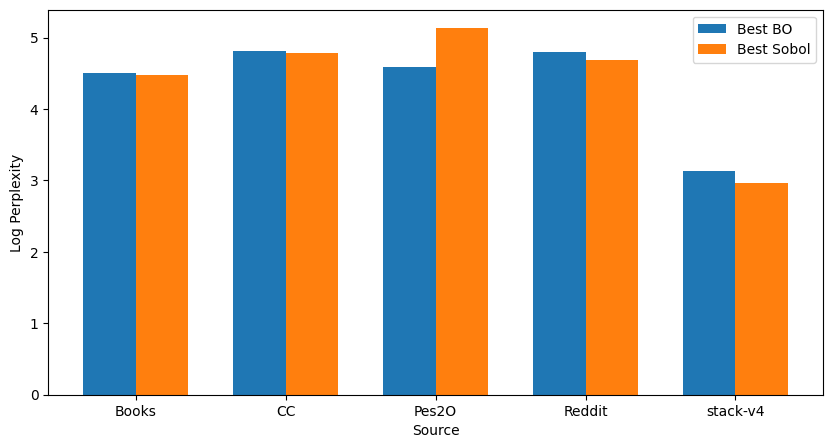

In [18]:
# Extract keys and values
domains = list(res.keys())
best_scores = list(res.values())
init_scores = list(ref_res.values())

# Define the positions of the bars
x = range(len(domains))
width = 0.35  # width of the bars

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([i - width/2 for i in x], best_scores, width, label='Best BO')
ax.bar([i + width/2 for i in x], init_scores, width, label='Best Sobol')

# Adding labels and title
ax.set_xlabel('Source')
ax.set_ylabel('Log Perplexity')
ax.set_xticks(x)
ax.set_xticklabels(domains)
ax.legend()

In [19]:
print(best_scores)
print(init_scores)

[4.507295250892639, 4.807746887207031, 4.587223589420319, 4.805037200450897, 3.136811763048172]
[4.483496695756912, 4.782995909452438, 5.134135961532593, 4.684157907962799, 2.9697303026914597]
